# Project Natural Language Processing (NLP)

## Goal:
Develop a predictive model to identify GitHub repository's primary programming language using README file content.

# Imports

In [1]:
# standard imports
import numpy as np
import pandas as pd

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# local imports
import acquire as a
import prepare as p
import lugo_explore as e
import modeling as m


# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

# Acquire
- Data acquired from GitHub's <a href='https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories'>the most starred repositories</a>
- It contained 960 rows and 3 columns before cleaning
- Each row represents a repository from GitHub README.md files. 
- Each column contains information from the README files

In [2]:
# acquire data
df = a.get_readmes()

# Data Dictionary

| Feature         | Description                                                                             |
| --------------- | --------------------------------------------------------------------------------------- |
| repo            | The owners/organization and the repository name                                         |
| language        | The most common programming language in the repository                                  |
| top3other       | The top 3 most common programming languages across repositories and the rest are other  |
| readme_contents | The content inside the README.md file                                                   |
| clean           | The content after the prepare phase.                                                    |
| lemmatized      | The clean content after being lemmatized.                                               |

# Prepare
- Removed 379 duplicates
- Didn't rename the columns
- Checked for nulls and removed 37 rows
- Checked that column data types were appropriate for exploration
- Outliers were found but kept them as we felt they were important
- Added a target column named "top3other"
- A new feature was created named "length"
- No encoded categorical variables
- Split data into train, validate, and test (60/20/20), stratifying is 'top3other'
- NO Scaled was performed
- Cleaned the readme content using normalize, tokenize, stopwords and lemmatize

In [3]:
# preparing data for exploration
df = p.prep_readmes(df)

## Splitting Data

In [4]:
# splitting data in to train, validate, and test
train, validate, test = p.split_data(df, 'top3other')

In [5]:
train.shape, validate.shape, test.shape

((326, 6), (109, 6), (109, 6))

## A summary of the data

In [6]:
train.describe()

,repo,language,readme_contents,clean,lemmatized,top3other
count,326,326,326,326,326,326
unique,326,31,326,326,326,4
top,tubalmartin/riloadr,JavaScript,"# Riloadr 1.5.3 - Jul 29, 2014\n\nA cross-brow...",riloadr jul cross browser framework independen...,riloadr jul cross browser framework independen...,other
freq,1,90,1,1,1,138


In [7]:
a.data_summary(train)

data shape: (326, 6)


,data type,#missing,%missing,#unique,count,first_value,second_value
repo,object,0,0.0,326,326,smileyborg/TableViewCellWithAutoLayoutiOS8,taion/scroll-behavior
language,object,0,0.0,31,326,Swift,JavaScript
readme_contents,object,0,0.0,326,326,TableViewCellWithAutoLayoutiOS8\n=============...,# scroll-behavior [![Travis][build-badge]][bui...
clean,object,0,0.0,326,326,tableviewcellwithautolayoutios note sample pro...,scroll behavior travis build badge build npm n...
lemmatized,object,0,0.0,326,326,tableviewcellwithautolayoutios note sample pro...,scroll behavior travis build badge build npm n...
top3other,object,0,0.0,4,326,other,JavaScript


## A brief look at the data

In [8]:
train.head()

,repo,language,readme_contents,clean,lemmatized,top3other
419,tubalmartin/riloadr,JavaScript,"# Riloadr 1.5.3 - Jul 29, 2014\n\nA cross-brow...",riloadr jul cross browser framework independen...,riloadr jul cross browser framework independen...,JavaScript
416,Yalantis/ColorMatchTabs,Swift,# ColorMatchTabs\n\n![cocoapods](https://img.s...,colormatchtabs cocoapods https img shields io ...,colormatchtabs cocoapods http img shield io co...,other
137,lukescott/DraggableCollectionView,Objective-C,DraggableCollectionView\n=====================...,draggablecollectionview extension uicollection...,draggablecollectionview extension uicollection...,Objective-C
244,Zewo/Zewo,Swift,"<p align=""center"">\n <a href=""http://zewo.i...",p aligncenter hrefhttp zewo ioimg srchttps raw...,p aligncenter hrefhttp zewo ioimg srchttps raw...,other
333,neonbjb/tortoise-tts,Python,# TorToiSe\n\nTortoise is a text-to-speech pro...,tortoise tortoise text speech program built fo...,tortoise tortoise text speech program built fo...,other


# Explore

## Question 0: What is the distribution of the target?

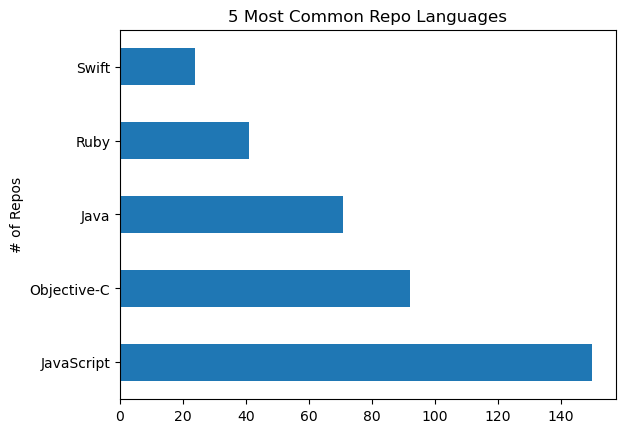

In [9]:
df.language.value_counts().head(5).plot(kind='barh',title='5 Most Common Repo Languages',xlabel='# of Repos',ylabel='Most Common Language in the Repo');

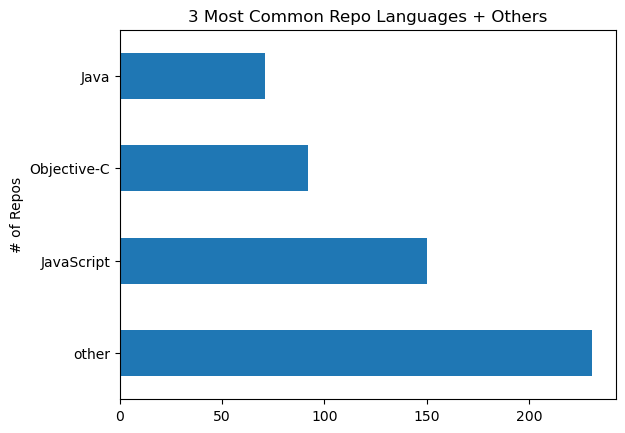

In [10]:
df.top3other.value_counts().plot(kind='barh',title='3 Most Common Repo Languages + Others',xlabel='# of Repos',ylabel='Most Common Language or Other');

## Question 0: What is the distribution of the Split?

In [11]:
df_value_counts = e.get_normalized_value_counts(train, validate, test)
df_value_counts

,train,val,test
other,0.423313,0.431193,0.422018
JavaScript,0.276074,0.275229,0.275229
Objective-C,0.168712,0.165138,0.174312
Java,0.131902,0.128440,0.128440


<div class="alert alert-block alert-info"> 
<b>Initial Explore Summarize</b>

- 

</div>

## Question 1: What are the most common words in READMEs?

In [12]:
all_words = [word for row in df['lemmatized'] for word in row.split()]
len(all_words)

299471

In [13]:
all_freq = pd.Series(all_words).value_counts()
all_freq.head(20)

http       8045
com        6204
github     3831
use        1774
io         1425
j          1413
file       1287
org        1217
code       1135
license    1060
example    1051
www        1019
img         978
master      974
project     939
install     932
using       930
image       928
default     897
name        867
dtype: int64

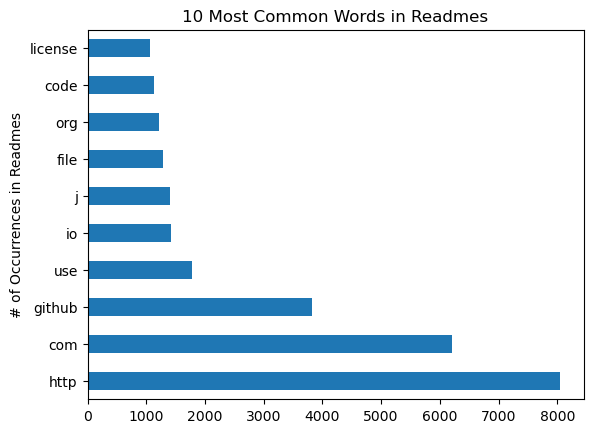

In [14]:
all_freq.head(10).plot(kind='barh',title='10 Most Common Words in Readmes',xlabel='# of Occurrences in Readmes',ylabel='Word');

<div class="alert alert-block alert-info"> 
<b>Question 1 Summarize</b>

- 

</div>

## Question 2: Does the length of the README vary by programming language?

In [15]:
# looking at lemmatized column to stay consistent
# create column based on length of lemmatized readme
train = train.assign(length = train['lemmatized'].str.len())
train

,repo,language,readme_contents,clean,lemmatized,top3other,length
419,tubalmartin/riloadr,JavaScript,"# Riloadr 1.5.3 - Jul 29, 2014\n\nA cross-brow...",riloadr jul cross browser framework independen...,riloadr jul cross browser framework independen...,JavaScript,22938
416,Yalantis/ColorMatchTabs,Swift,# ColorMatchTabs\n\n![cocoapods](https://img.s...,colormatchtabs cocoapods https img shields io ...,colormatchtabs cocoapods http img shield io co...,other,2912
137,lukescott/DraggableCollectionView,Objective-C,DraggableCollectionView\n=====================...,draggablecollectionview extension uicollection...,draggablecollectionview extension uicollection...,Objective-C,1309
244,Zewo/Zewo,Swift,"<p align=""center"">\n <a href=""http://zewo.i...",p aligncenter hrefhttp zewo ioimg srchttps raw...,p aligncenter hrefhttp zewo ioimg srchttps raw...,other,3597
333,neonbjb/tortoise-tts,Python,# TorToiSe\n\nTortoise is a text-to-speech pro...,tortoise tortoise text speech program built fo...,tortoise tortoise text speech program built fo...,other,10201
...,...,...,...,...,...,...,...
240,argerim/select2-rails,Ruby,# Select2 for rails asset pipeline\n\n[Select2...,select rails asset pipeline select https githu...,select rail asset pipeline select http github ...,other,2210
386,graphistry/pygraphistry,Python,# PyGraphistry: Explore Relationships\n\n![Bui...,pygraphistry explore relationships build statu...,pygraphistry explore relationship build status...,other,40175
239,bhavesh-hirpara/MultipleImagePick,Java,# Smart Gallery with Single and Multiple image...,smart gallery single multiple image pick actio...,smart gallery single multiple image pick actio...,Java,1800
217,stripe-archive/react-stripe-elements,JavaScript,## We’ve moved to [@stripe/react-stripe-js](ht...,weve moved stripe react stripe js https github...,weve moved stripe react stripe j http github c...,JavaScript,18807


In [16]:
train.groupby('top3other').length.mean()

top3other
Java           2389.860465
JavaScript     4655.400000
Objective-C    3066.000000
other          4372.282609
Name: length, dtype: float64

In [17]:
train.groupby('top3other').length.median()

top3other
Java           1951.0
JavaScript     3624.0
Objective-C    1930.0
other          2701.0
Name: length, dtype: float64

In [18]:
train.length.median()

2571.0

In [19]:
train[train.length<50000].groupby('top3other').length.mean()

top3other
Java           2389.860465
JavaScript     4655.400000
Objective-C    3066.000000
other          4372.282609
Name: length, dtype: float64

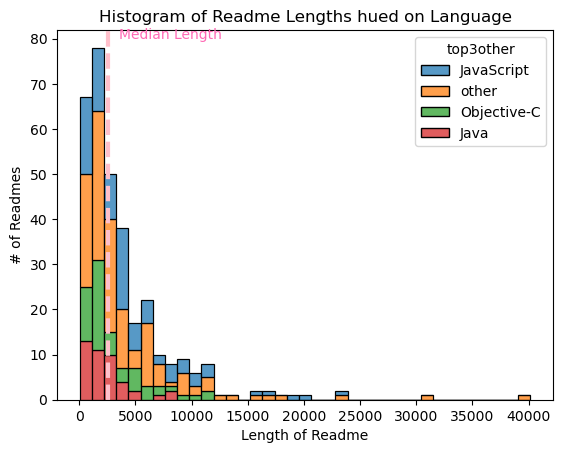

In [20]:
e.plot_readme_lengths(train)

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilized the Wilcoxon signed-rank test: it compares two related samples to see if they come from the same distribution. It's a non-parametric alternative to the paired t-test, useful when normal distribution cannot be assumed.

In [21]:
# null hyp Javascript readme lengths are about the same as the population median readme lengths
e.wilcox(train,'top3other','JavaScript','length')

Wilcoxon Test:
 stat = 1150.5, p = 0.0004906479804396669


In [22]:
e.compare_readme_lengths(train, alpha=0.05)

|--------------------------------------|
JavaScript
The readme lengths of JavaScript are significantly different than the population median readme length (p=0.0004906479804396669).
|--------------------------------------|
other
The readme lengths of other are significantly different than the population median readme length (p=0.014225215852737477).
|--------------------------------------|
Objective-C
The readme lengths of Objective-C are NOT significantly different than the population median readme length (p=0.9759587789343889).
|--------------------------------------|
Java
The readme lengths of Java are NOT significantly different than the population median readme length (p=0.07472612576088977).


<div class="alert alert-block alert-info"> 
<b>Question 2 Summarize</b>

- p is < $\alpha$, so we can reject the $H_a$ which suggest the $H_0$

</div>

## Question 3: Do different programming languages use a different number of unique words?

In [23]:
javascript, java, objective_c, other, all_words = e.count_unique_words_by_language(train)

JavaScript unique words: 7336
Java unique words: 2825
Objective-C unique words: 4045
Other unique words: 10915
All unique words: 18611


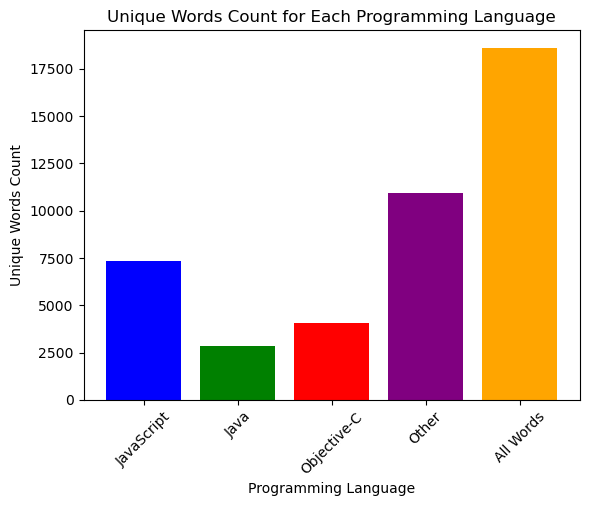

In [24]:
e.plot_unique_words_count(javascript, java, objective_c, other, all_words)

<div class="alert alert-block alert-info"> 
<b>Question 3 Summarize</b>

- These results suggest that the vocabulary used in README files can vary significantly depending on the programming language. The "other" category and JavaScript projects tend to use a wider range of vocabulary, while Java projects use a more limited set of words. This could be due to a variety of factors, including the complexity of the projects, the conventions of the programming language community, or the personal style of the authors.

</div>

## Question 4: Are there any words that uniquely identify a programming language?

In [25]:
unique_word_dicts = e.analyze_unique_words(javascript, java, objective_c, other)
uni_javascript = unique_word_dicts[0]
uni_java = unique_word_dicts[1]
uni_objective_c = unique_word_dicts[2]
uni_other = unique_word_dicts[3]

In [26]:
df = e.conv_dict_to_df(unique_word_dicts)
df.sort_values(by='uni_javascript', ascending=False).head(20)

,uni_javascript,uni_java,uni_objective_c,uni_other
j,701.0,NaN,NaN,NaN
react,319.0,NaN,NaN,NaN
npm,318.0,NaN,NaN,NaN
function,302.0,NaN,NaN,NaN
option,295.0,NaN,NaN,NaN
default,268.0,NaN,NaN,NaN
data,267.0,NaN,NaN,279.0
image,260.0,55.0,101.0,NaN
example,251.0,NaN,85.0,290.0
name,251.0,NaN,NaN,NaN


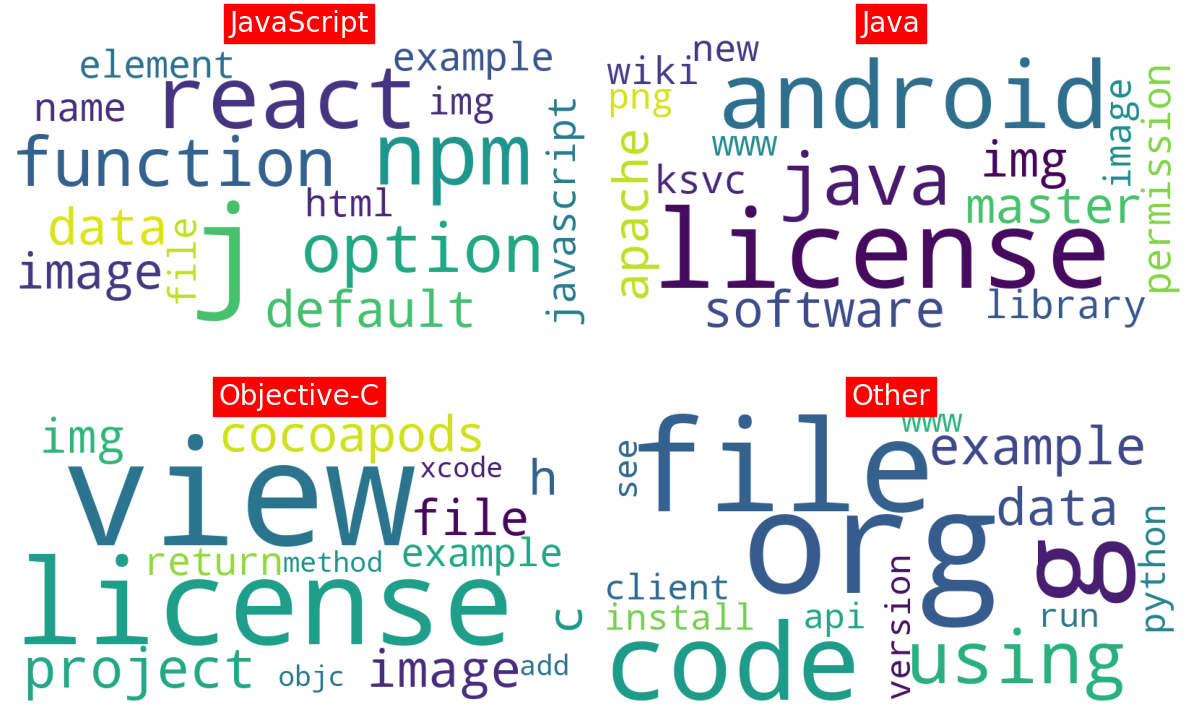

In [27]:
e.create_word_clouds(uni_javascript, uni_java, uni_objective_c, uni_other)

<div class="alert alert-block alert-info"> 
<b>Question 4 Summarize</b>

- 

</div>

## Exploration Summary
* Plain English bullets as required

* Features that have a relationship with target (stats test for feature_y, feature_z, etc. completed on separate working notebook:
    * feature x ...
    * feature y
    * feature z


<div class="alert alert-block alert-success"> 
<b>Features moving to modeling</b>

- All lemmatized words!

</div>

# Modeling
* Evaluation Most Comment = "other" that gives us a 0.4233128834355828 which is the baseline prediction 
* I will evaluate 3 different model types and various hyperparameter configurations
    * Complement Naive Bayes, Multinomial Naive Bayes, Logistic Regression Model
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test

In [28]:
feat = m.get_unique(train)

JavaScript unique words: 7336
Java unique words: 2825
Objective-C unique words: 4045
Other unique words: 10915
All unique words: 18611


In [29]:
X_train, X_val, X_test, y_train, y_val, y_test = m.get_Xs(train, validate, test)
Xtr_tfidf,Xv_tfidf,Xt_tfidf = m.make_tfidf(X_train,X_val,X_test)
Xtr_cv,Xv_cv,Xt_cv = m.make_cv(X_train,X_val,X_test)

### BASELINE

In [30]:
# baseline
y_train.value_counts(normalize=True)[0]

0.4233128834355828

## Complement Naive Bayes Model

In [31]:
# Complement Naive Bayes
m.cnb_model(Xtr_tfidf[feat],y_train,Xv_tfidf[feat],y_val)

Complement Naive Bayes
Train Accuracy:      99.39%
Validation Accuracy: 78.9%


<div class="alert alert-block alert-info"> 
<b>Complement Naive Bayes Model Summarize</b>

- The Complement Naive Bayes model significantly outperforms the baseline, achieving a training accuracy of 99.39% and a validation accuracy of 78.9%.

</div>

## Multinomial Naive Bayes Model

In [32]:
# Multinomial Naive Bayes
m.mnb_model(Xtr_cv,y_train,Xv_cv,y_val)

Multinomial Naive Bayes
Train Accuracy:      99.69%
Validation Accuracy: 78.9%


<div class="alert alert-block alert-info"> 
<b>Multinomial Naive Bayes Model Summarize</b>

- The Multinomial Naive Bayes model achieves a high training accuracy of 99.69% and matches the Complement Naive Bayes model's validation accuracy of 78.9%.

</div>

## Logistic Regression Model

In [33]:
# Logistic Regression
m.log_model(Xtr_tfidf[feat],y_train,Xv_tfidf[feat],y_val)

Logistic Regression
Train Accuracy:      96.32%
Validation Accuracy: 76.14999999999999%


<div class="alert alert-block alert-info"> 
<b>Logistic Regression Model Summarize</b>

- The Logistic Regression model achieves a training accuracy of 96.32% and a slightly lower validation accuracy of 76.15% compared to the Naive Bayes models.

</div>

## Comparing Models
* All three models significantly outperform the baseline. The Complement and Multinomial Naive Bayes models achieve the highest validation accuracy of 78.9%, while the Logistic Regression model, despite a slightly lower validation accuracy of 76.15%, might offer better interpretability.

## Test on Best Model: Complement Naive Bayes

In [34]:
# tested on the CNB
m.test_model(Xtr_tfidf[feat],y_train,Xt_tfidf[feat],y_test)

Complement Naive Bayes
Baseline Accuracy: 42.33%
Test Accuracy:     67.89%


<div class="alert alert-block alert-info"> 
<b>Test Summarize</b>

- The Complement Naive Bayes model was tested on unseen data and achieved a test accuracy of 67.89%, which is significantly higher than the baseline accuracy of 42.33%. This suggests that the model generalizes well and is effective at predicting the programming language from README files.

</div>

<div class="alert alert-block alert-success"> 
<b>Modeling Summary</b>

* Three models - Complement Naive Bayes, Multinomial Naive Bayes, and Logistic Regression - were trained to predict a GitHub repository's programming language from its README file. All models significantly outperformed the baseline, with the Naive Bayes models achieving the highest validation accuracy of 78.9%. The Logistic Regression model, while slightly less accurate at 76.15%, may offer better interpretability. In testing, the Complement Naive Bayes model demonstrated good generalization to unseen data, achieving a test accuracy of 67.89%, significantly higher than the baseline. These results suggest that these models, particularly the Naive Bayes models, are effective at predicting a repository's programming language from its README file.

</div>

# Conclusions

## Exploration
* bullets

## Modeling
* bullets

## Recommendations
* bullets

## Next steps
* bullets